# Commercial Relations Of Colombia In The Last 20 Years

The main idea of ​​this notebook is to explore in a fast way the develop of the commercial relations of colombia during the las 20 years using python tools. 

First, we are going to extract data from the TradeMap website on Colombian imports and exports. So we're going to turn some kind of time series data into panel data to make it easier to explore.



In [8]:
# Data structures
import pandas as pd 

# Data graphic visualization
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Extra Modules 
import warnings
warnings.filterwarnings("ignore")

## Restructuring the data

#### **FROM THIS...**

In [9]:
imports = pd.read_table('https://raw.githubusercontent.com/BautistaDavid/Machine-Learning-Class-2022/main/data/Ttrade_map_imports_colombia.txt')
exports = pd.read_table('https://raw.githubusercontent.com/BautistaDavid/Machine-Learning-Class-2022/main/data/trade_map_exports_colombia.txt')

imports.drop(columns = 'Unnamed: 21', inplace = True)
exports.drop(columns = 'Unnamed: 21', inplace = True)

imports.columns = ['country']+ list(range(2001,2021))
exports.columns = ['country']+ list(range(2001,2021))

imports = imports.set_index('country')
exports = exports.set_index('country')

# imports = imports.drop(0).reset_index().drop(columns = 'index').set_index('country')
# exports = exports.drop(0).reset_index().drop(columns = 'index').set_index('country')

In [10]:
exports.head(2)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country,,,,,,,,,,,,,,,,,,,,
World,12301486,11897488,13092218,16729678,21190439,24390975,29991332,37625882,32852986,39819529,56953516,60273618,58821870,54794812,35690767,31095444,37770123,41769699,39496225,31045676
United States of America,5344533,5328470,6160245,7042201,8851631,9948230,10609167,14288833,13123466,17143277,21948535,22216238,18692895,14470697,10052617,10215894,10975962,11080579,12265471,9442028


In [11]:
imports.head(2)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country,,,,,,,,,,,,,,,,,,,,
World,12820352,12689965,13880613,17099537,21204162,26162440,32897045,39668840,32897671,40682508,54674822,58087854,59381197,64027610,54057599,44889367,46075705,51232805,50413025,43488662
United States of America,4442775,4051198,4112710,4806760,6033241,6960605,8631115,11583019,9505791,10531813,13663338,14140116,16428423,18256281,15583375,11946833,12096143,13075918,12832603,10634174


#### **TO THIS...**

In [12]:
def restructuring_data(relation: str):
  panel_ = pd.DataFrame(columns = ['country','year','relation','amount'])
  countrys, years, amounts = [], [], []

  if relation == 'imports':
    for row in imports.iterrows():
      country, data = row[0], row[1]
      for _,i in enumerate(data):
        countrys.append(country)
        years.append(2001 + _)
        amounts.append(data[2001 + _])
  else:
    for row in exports.iterrows():
      country, data = row[0], row[1]
      for _,i in enumerate(data):
        countrys.append(country)
        years.append(2001 + _)
        amounts.append(data[2001 + _])

  panel_['country'] = countrys
  panel_['year'] = years
  panel_['amount'] = amounts
  panel_['relation'] = relation
  return panel_ 

panel = pd.concat([restructuring_data('imports'),restructuring_data('exports')])


In [42]:
panel.head(5)

,country,year,relation,amount
0,World,2001,imports,12820352
1,World,2002,imports,12689965
2,World,2003,imports,13880613
3,World,2004,imports,17099537
4,World,2005,imports,21204162


## Let's talk about imports

Below you can see the annual behavior of Colombian imports from 2001 to 2020. There are also some interesting maximums points during this time series.

In [14]:
total = panel[(panel['country'] == 'World') & (panel['relation'] =='imports')]
total['year'] = pd.to_datetime(total['year'], format='%Y')

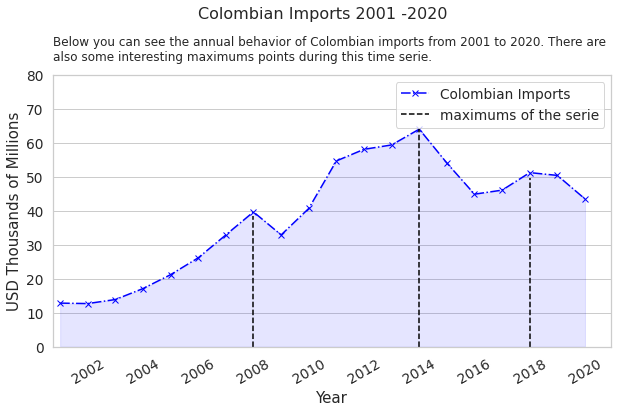

In [41]:
fig = plt.figure(figsize = (10,5))
plt.title('Below you can see the annual behavior of Colombian imports from 2001 to 2020.\
 There are\nalso some interesting maximums points during this time serie.', loc = 'left', y=0.98,fontsize=12)
plt.grid(axis = 'x')
fig.suptitle('Colombian Imports 2001 -2020', y=1.07, fontsize=16)
ax1 = fig.add_subplot(1,1,1)  # se crea un eje pero la mayoria de comandos funciona con normalidad de plt
ax1.fill_between(total['year'], total['amount'] /1000000,alpha=0.1,color="blue")
ax1.plot_date(total['year'],total['amount'] /1000000, color = 'blue',marker = 'x', linestyle = '-.', label = 'Colombian Imports')    
ax1.set_ylabel('USD Thousands of Millions', fontsize = 15)
ax1.set_xlabel('Year' ,fontsize = 15)
ax1.axis(ymin=0, ymax=80, xmin = pd.Timestamp('2000-10-01') )

plt.axvline(pd.Timestamp('2008-01-01'), color='black', ymax = 0.48, linestyle ='--', label = 'maximums of the serie')
plt.axvline(pd.Timestamp('2014-01-01'), color='black', ymax = 0.80, linestyle ='--')
plt.axvline(pd.Timestamp('2018-01-01'), color='black', ymax = 0.62, linestyle ='--')
plt.xticks(rotation = 30)
plt.legend()
fig.show()

So, there are some years when the amount of imports goes down compared to the following year. Now let's explore the main partner countries of Colombian imports during these years. Maybe looking that information we can talk about why the imports amounts goes down in some years.

To facilitate this analysis we are going to choose the five main commercial partners of Colombia related to imports in 2020 and then we are going to analyze their behavior since 2001

In [16]:
five_imp = panel[(panel['relation'] == 'imports') & (panel['year'] == 2020)].sort_values(by = 'amount', ascending = False).reset_index().loc[1:5]
five_imp

,index,country,year,relation,amount
1,39,United States of America,2020,imports,10634174
2,59,China,2020,imports,10398882
3,79,Mexico,2020,imports,2925827
4,99,Brazil,2020,imports,2435489
5,119,Germany,2020,imports,1643891


In [17]:
data_five_imp = panel[((panel['country'] == 'United States of America') | (panel['country'] == 'China') | 
                     (panel['country'] == 'Mexico') | (panel['country'] == 'Brazil') | (panel['country'] == 'Germany'))]

data_five_imp = data_five_imp[data_five_imp['relation'] == 'imports']

data_five_imp['amount'] = data_five_imp['amount'] / 1000000

Below we can see an applied bar graph, where the 5 countries that Colombia imported the most during 2020 participate. The evolution of the participation of these 5 countries since 2001 is shown.

The two following graphs have the same idea, however, in one of them the bars for each year are presented consecutively, to facilitate the comparison of magnitudes. The last graph is simply the time series of the participation of these countries in Colombian imports from 2001 to 2002

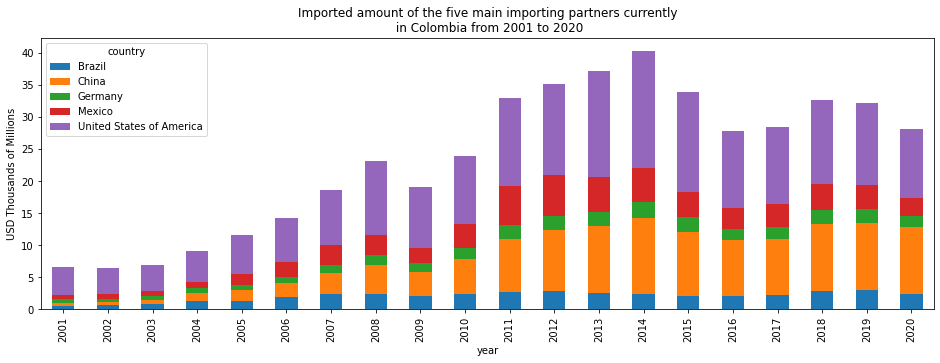

In [18]:
(data_five_imp.groupby(['country','year'])['amount'].sum().reset_index()
.pivot(index ='year', values ='amount', columns = 'country')
.plot(kind = 'bar', stacked = True, figsize = (16,5),\
      title = 'Imported amount of the five main importing partners currently\n in Colombia from 2001 to 2020', ylabel ='USD Thousands of Millions'))


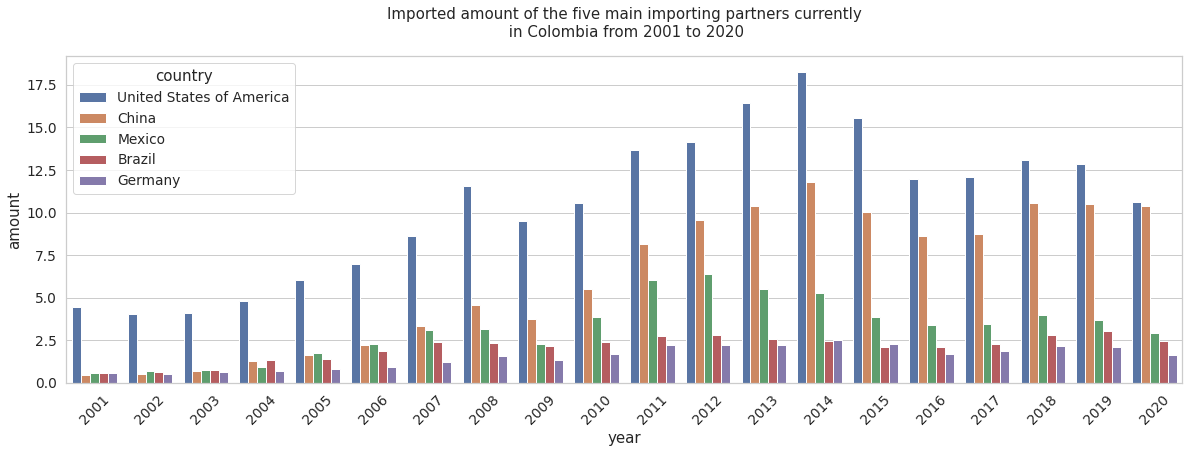

In [19]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})  # Seaborn Style
sns.set_context("notebook", font_scale=1.25)            # More Seaborn Style
rcParams['axes.titlepad'] = 20                          # set a space between  the title and the figure
plt.xticks(rotation=45)
plt.ylabel('USD Thousands of Millions')
plt.title('Imported amount of the five main importing partners currently\n in Colombia from 2001 to 2020')
sns.barplot(data = data_five_imp, x = 'year', y ='amount', hue = 'country')


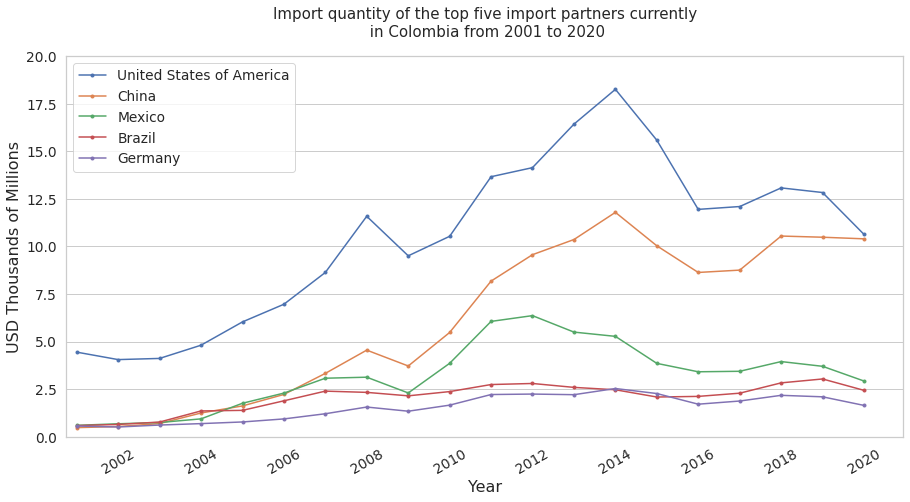

In [20]:
data = data_five_imp
data['year'] = pd.to_datetime(data['year'], format='%Y')

plt.figure(figsize = (15,7))

for i in list(data['country'].unique()):
  data_ = data[data['country'] == i]
  plt.plot(data_['year'],data_['amount'], label = i, marker = '.')
plt.grid(axis = 'x')
plt.xlim(left =pd.Timestamp('2000-10-01'))
plt.ylim(0,20)
plt.legend()
# plt.title('Imported amount of the five main importing partners currently\n in Colombia from 2001 to 2020')
plt.title('Import quantity of the top five import partners currently\n in Colombia from 2001 to 2020')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('USD Thousands of Millions', fontsize = 16)
plt.xticks(rotation = 30)
plt.show()

The three previous graphs allow us to measure the importance of countries such as the United States and China for Colombian imports, since in all the periods these two represented a great magnitude of the total.

Now below you can see a heatmap that adds another 5 more countries to the analysis to measure the comparison of the imported magnitude of each country from 2001 to 2020

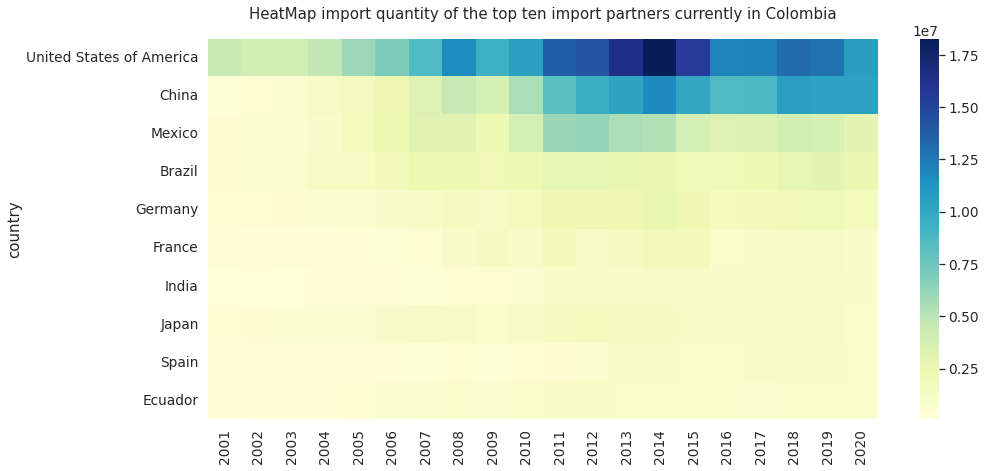

In [21]:
data_ten_imp = imports.drop('World').loc['United States of America':'Ecuador']

plt.figure(figsize = (15,7))
plt.title('HeatMap import quantity of the top ten import partners currently in Colombia')
heat_imp = sns.heatmap(data = data_ten_imp,cmap="YlGnBu")


It could be thought that this great difference between countries such as the United States and China is due to the large size of their economies, so we are going to try to generate an indicator that can show us a slightly more suitable measure to compare the countries. We are going to generate a variable that is the relationship between the amount imported in 2020 from that country over the 2020 population of that territory.

In [22]:
df_indicator = five_imp
df_indicator['population'] = [329770000,1414350000, 127792000, 212559409, 83155031]  # 2020 population of usa, china, mexico brazil germany
df_indicator['indicator'] = df_indicator['amount'] / df_indicator['population']
df_indicator  

,index,country,year,relation,amount,population,indicator
1,39,United States of America,2020,imports,10634174,329770000,0.032247
2,59,China,2020,imports,10398882,1414350000,0.007352
3,79,Mexico,2020,imports,2925827,127792000,0.022895
4,99,Brazil,2020,imports,2435489,212559409,0.011458
5,119,Germany,2020,imports,1643891,83155031,0.019769


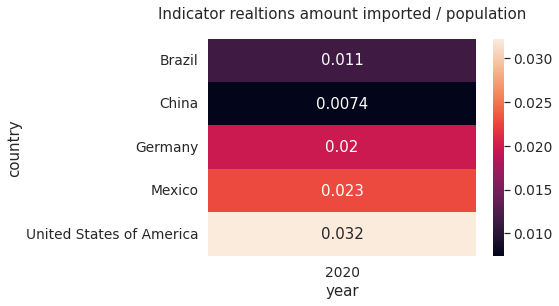

In [23]:
plt.title('Indicator realtions amount imported / population')
heat_imp_ind = sns.heatmap(pd.pivot(df_indicator,index = 'country',values = 'indicator', columns = 'year'),annot = True)

Note that now there are changes in the 'positions' of the countries, the United States continues to present the highest ratio, however, due to its large population, China has the lowest indicator of these five countries

## Now, about exports...

We are going to repeat the same process of analysis and graphics but now with the exports

In [24]:
total_exp = panel[(panel['country'] == 'World') & (panel['relation'] =='exports')]
total_exp['year'] = pd.to_datetime(total['year'], format='%Y')

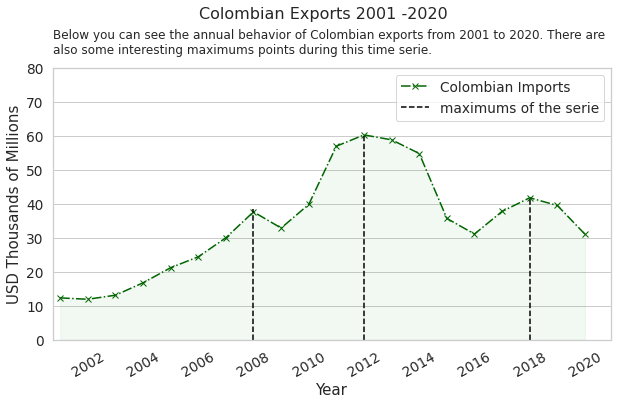

In [25]:

fig = plt.figure(figsize = (10,5))
plt.title('Below you can see the annual behavior of Colombian exports from 2001 to 2020.\
 There are\nalso some interesting maximums points during this time serie.', loc = 'left', y=0.98,fontsize=12)
plt.grid(axis = 'x')
fig.suptitle('Colombian Exports 2001 -2020', y=1.05, fontsize=16)
ax1 = fig.add_subplot(1,1,1)  # se crea un eje pero la mayoria de comandos funciona con normalidad de plt
ax1.fill_between(total_exp['year'], total_exp['amount'] /1000000,alpha=0.05,color="green")
ax1.plot_date(total_exp['year'],total_exp['amount'] /1000000, color = 'DarkGreen',marker = 'x', linestyle = '-.', label = 'Colombian Imports')    
ax1.set_ylabel('USD Thousands of Millions', fontsize = 15)
ax1.set_xlabel('Year' ,fontsize = 15)
ax1.axis(ymin=0, ymax=80, xmin = pd.Timestamp('2000-10-01') )

plt.axvline(pd.Timestamp('2008-01-01'), color='black', ymax = 0.48, linestyle ='--', label = 'maximums of the serie')
plt.axvline(pd.Timestamp('2012-01-01'), color='black', ymax = 0.75, linestyle ='--')
plt.axvline(pd.Timestamp('2018-01-01'), color='black', ymax = 0.52, linestyle ='--')
plt.xticks(rotation = 30)
plt.legend()
fig.show()

In [26]:
five_exp = panel[(panel['relation'] == 'exports') & (panel['year'] == 2020)].sort_values(by = 'amount', ascending = False).reset_index().loc[1:5]
five_exp

,index,country,year,relation,amount
1,39,United States of America,2020,exports,9442028
2,59,China,2020,exports,2670041
3,79,Panama,2020,exports,1510555
4,99,Ecuador,2020,exports,1473607
5,119,Brazil,2020,exports,1274000


In [27]:
data_five_exp = panel[((panel['country'] == 'United States of America') | (panel['country'] == 'China') | 
                     (panel['country'] == 'Mexico') | (panel['country'] == 'Brazil') | (panel['country'] == 'Germany'))]

data_five_exp = data_five_exp[data_five_exp['relation'] == 'exports']

data_five_exp['amount'] = data_five_exp['amount'] / 1000000

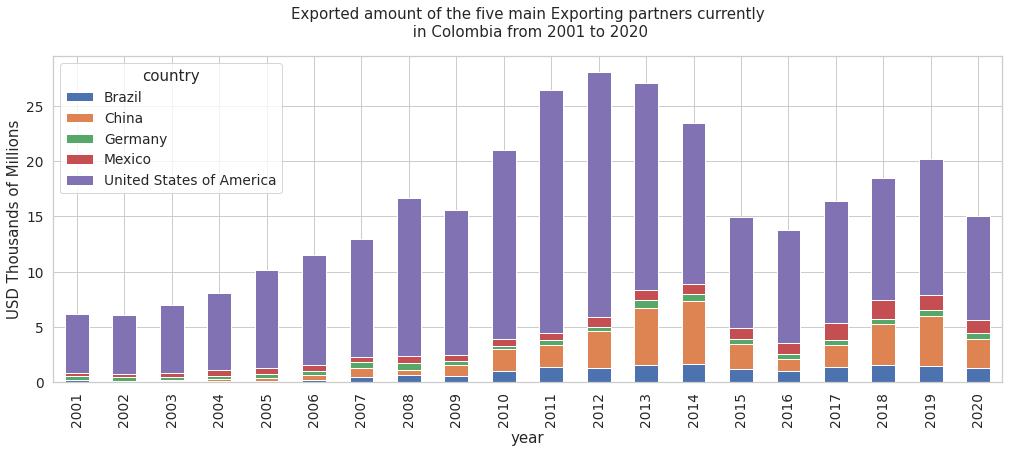

In [28]:
(data_five_exp.groupby(['country','year'])['amount'].sum().reset_index()
.pivot(index ='year', values ='amount', columns = 'country')
.plot(kind = 'bar', stacked = True, figsize = (17,6),\
      title = 'Exported amount of the five main Exporting partners currently\n in Colombia from 2001 to 2020', ylabel ='USD Thousands of Millions'))


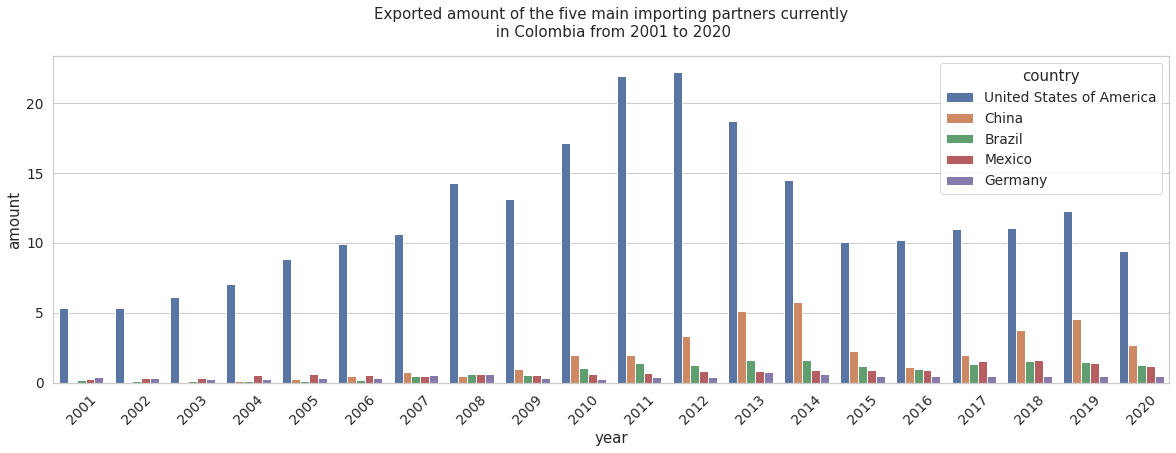

In [29]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})  # Seaborn Style
sns.set_context("notebook", font_scale=1.25)            # More Seaborn Style
rcParams['axes.titlepad'] = 20                          # set a space between  the title and the figure
plt.xticks(rotation=45)
plt.ylabel('USD Thousands of Millions')
plt.title('Exported amount of the five main importing partners currently\n in Colombia from 2001 to 2020')
sns.barplot(data = data_five_exp, x = 'year', y ='amount', hue = 'country')


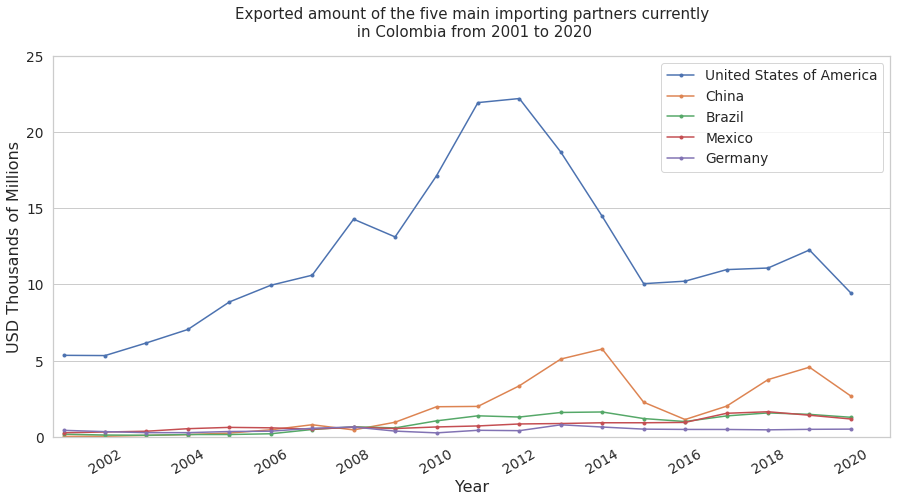

In [30]:
data = data_five_exp
data['year'] = pd.to_datetime(data['year'], format='%Y')

plt.figure(figsize = (15,7))

for i in list(data['country'].unique()):
  data_ = data[data['country'] == i]
  plt.plot(data_['year'],data_['amount'], label = i, marker = '.')
plt.grid(axis = 'x')
plt.xlim(left =pd.Timestamp('2000-10-01'))
plt.ylim(0,25)
plt.legend()
plt.title('Exported amount of the five main importing partners currently\n in Colombia from 2001 to 2020')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('USD Thousands of Millions', fontsize = 16)
plt.xticks(rotation = 30)
plt.show()


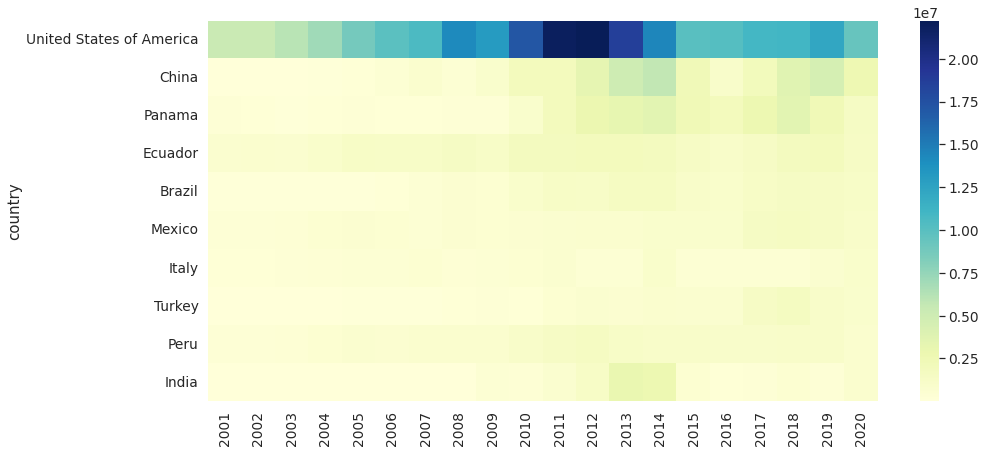

In [31]:
data_ten_exp = exports.drop('World').loc['United States of America':'India']

plt.figure(figsize = (15,7))
sns.heatmap(data = data_ten_exp,cmap="YlGnBu")


In [32]:
df_indicator = five_exp
df_indicator['population'] = [329770000,1414350000,4279000, 17511000, 212559409]  # 2020 population of usa, china, panama, ecuador brazil 
df_indicator['indicator'] = df_indicator['amount'] / df_indicator['population']
df_indicator  

,index,country,year,relation,amount,population,indicator
1,39,United States of America,2020,exports,9442028,329770000,0.028632
2,59,China,2020,exports,2670041,1414350000,0.001888
3,79,Panama,2020,exports,1510555,4279000,0.353016
4,99,Ecuador,2020,exports,1473607,17511000,0.084153
5,119,Brazil,2020,exports,1274000,212559409,0.005994


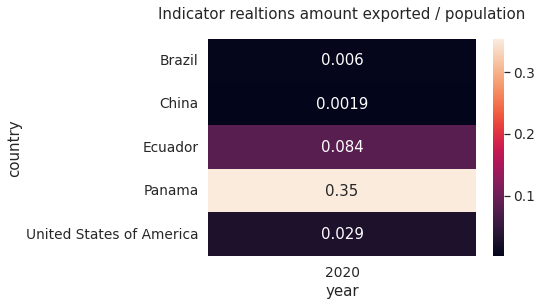

In [33]:
plt.title('Indicator realtions amount exported / population')
heat_exp_ind = sns.heatmap(pd.pivot(df_indicator,index = 'country',values = 'indicator', columns = 'year'),annot = True)

In the case of exports, the strong dependence on the United States as a trading partner was much more noticeable, if China and the United States made up the majority of the total in imports, now only the American country represents a large magnitude of the total.

However, note that when we generate our ratio indicator between amount and population for the year 2020, Panama manages to lead with the highest magnitude (it must be taken into account that this country is significantly smaller than the others).

## Now let's take a quick look at the balance of trade

Below are graphs and tables on the behavior of the country's trade balance

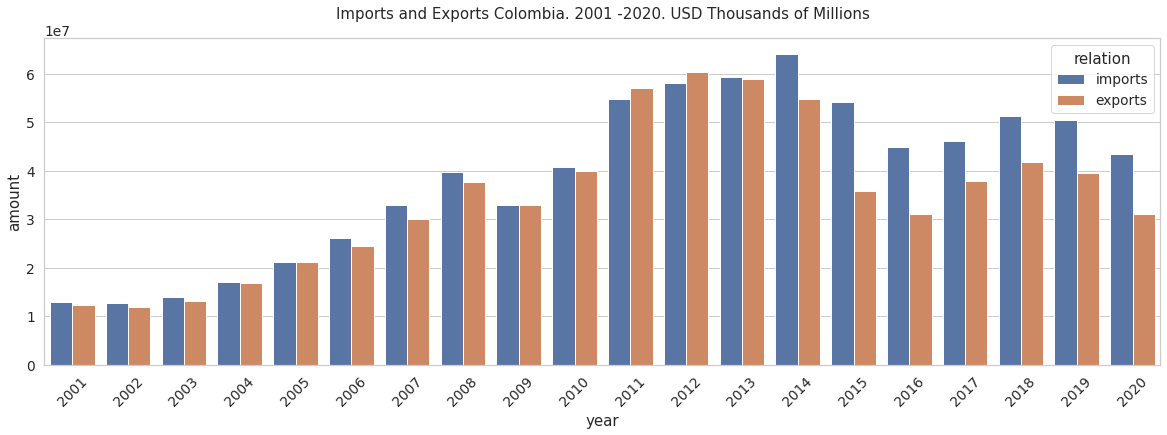

In [34]:
import seaborn as sns

test = panel[panel['country'] == 'World']

plt.figure(figsize=(20,6))
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})  # Seaborn Style
sns.set_context("notebook", font_scale=1.25)            # More Seaborn Style
rcParams['axes.titlepad'] = 20                          # set a space between  the title and the figure
plt.xticks(rotation=45)
# plt.ylim(0,1000000)
plt.ylabel('fa')
balance1 = sns.barplot(data = test, x = 'year', y ='amount', hue = 'relation').set_title('Imports and Exports Colombia. 2001 -2020. USD Thousands of Millions')

In [35]:
test = panel[panel['country'] == 'World']

exp_w = test[test['relation'] == 'exports']
exp_w['year'] = pd.to_datetime(exp_w['year'], format='%Y')

imp_w = test[test['relation'] == 'imports']
imp_w['year'] = pd.to_datetime(imp_w['year'], format='%Y')

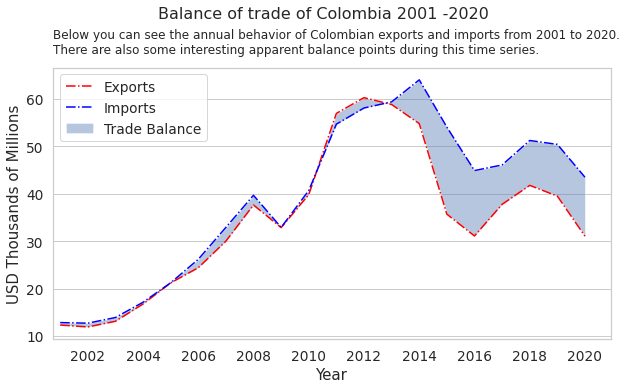

In [36]:

plt.figure(figsize = (10,5))
plt.title('Below you can see the annual behavior of Colombian exports and imports from 2001 to 2020.\
 \nThere are also some interesting apparent balance points during this time series.', loc = 'left', y=0.98,fontsize=12)
plt.suptitle('Balance of trade of Colombia 2001 -2020', y=1.05, fontsize=16)
plt.plot(exp_w['year'],exp_w['amount']/1000000, label = 'Exports', c = 'red', linestyle = '-.')
plt.plot(imp_w['year'],imp_w['amount']/1000000, label = 'Imports', c = 'blue', linestyle = '-.')
plt.fill_between(imp_w['year'],exp_w['amount']/1000000,imp_w['amount']/1000000,
                 alpha = 0.4,interpolate = True, label = 'Trade Balance')
plt.grid(axis ='x')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('USD Thousands of Millions',fontsize = 15) 
plt.xlim(left =pd.Timestamp('2000-10-01'))
plt.xticks(rotation = 0)
plt.legend()
plt.show()

In [37]:
balance = pd.concat([exp_w[['year','amount']],imp_w['amount']], axis = 1)
balance.columns = ['year','exp','imp']
balance['year2'] = [i for i in range(2001,2021)]
balance['trade_balance'] = balance['exp'] - balance['imp']
balance['trade_balance'] = balance['trade_balance']/1000000

In [40]:
balance.head(5)

,year,exp,imp,year2,trade_balance
0,2001-01-01,12301486,12820352,2001,-0.518866
1,2002-01-01,11897488,12689965,2002,-0.792477
2,2003-01-01,13092218,13880613,2003,-0.788395
3,2004-01-01,16729678,17099537,2004,-0.369859
4,2005-01-01,21190439,21204162,2005,-0.013723


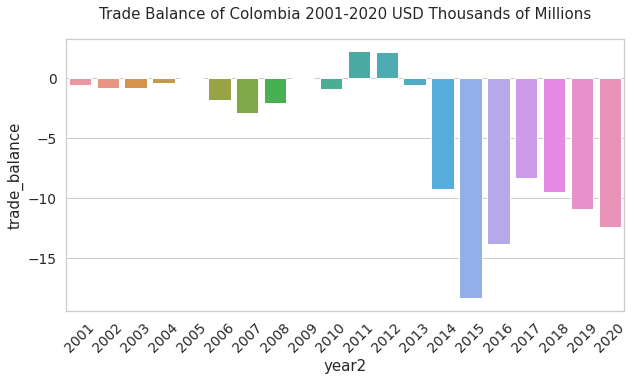

In [39]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 45)
trade = sns.barplot(x ='year2' ,data = balance, y = 'trade_balance').set_title('Trade Balance of Colombia 2001-2020 USD Thousands of Millions')

## Reflections

A quick review of the country's import and export data during the 21st century shows that there is a certain dependence on countries such as the United States and China, both in terms of exports and imports.

On the other hand, it can be noted that Colombia has been in deficit in the trade balance for most of the century. A future analysis of both import and export products and services would allow us to explore more thoroughly than this what happens with these balances within the territory.